In [31]:
# Import methods

%run Methods.ipynb

In [61]:
# New lmo

area = np.pi
thickness = 90

path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Electrochemical\2024\24LSB01\STD_CV\CV'
file = [os.path.join(path, i) for i in os.listdir(path)][0]
df_n = pd.read_csv(file, sep = ';')
df_n['Corrected Time'] = df_n['Time (s)'] - df_n['Time (s)'][0]
df_n = df_n.rename(columns = {'WE(1).Current (A)' : col_cv[1],
                          'Time (s)' : 'time',
                          'Corrected Time' : 'Time(s)',
                          'WE(1).Potential (V)' : col_cv[0]})

df_n['Current Density (µA/cm$^2$)'] = df_n[col_cv[1]] / area

dpi = 100

scan = []

for i in df_n['Scan'].unique():
    df = df_n[df_n['Scan'] == i]
    scan.append(df)


# for i in scan:
#     fig, ax = plt.subplots()
#     sns.scatterplot(x = i[col_cv[0]], y = i['Current Density (µA/cm$^2$)'], edgecolor = None, s = 3)
#     ax.yaxis.set_major_formatter(formatter_1e6)
#     plt.ylim(-95e-6, 90e-6)


In [33]:
# Normal LMO vs LMO TiO2



Text(0, 0.5, 'Potential vs AgCl/Ag (V)')

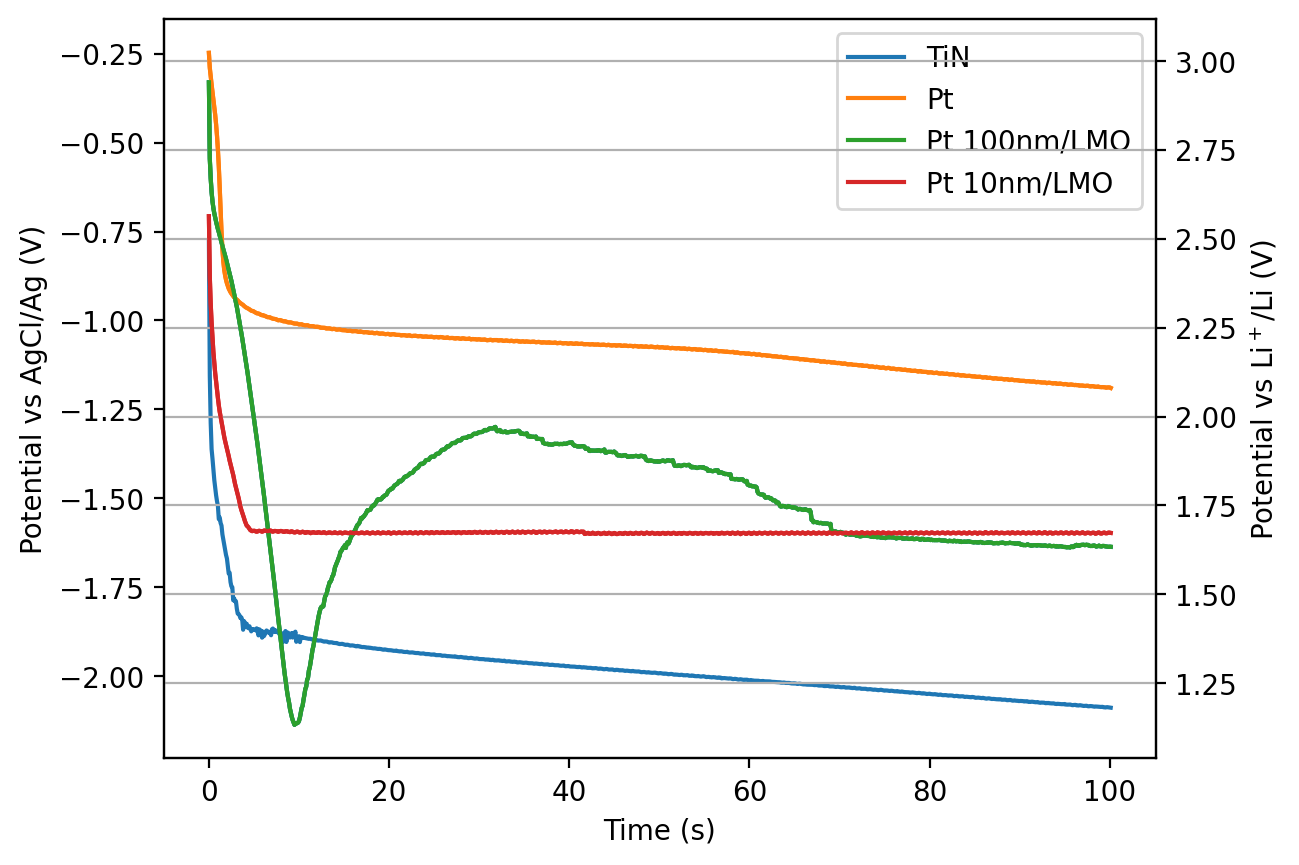

In [59]:
# NanoSCE deposition
lmo1 = r'C:\Users\lopezb41\OneDrive - imec\Desktop\24Feb_NanoSCE\19FEB\LMOSTD_1.txt'
df_lmo1 = pd.read_csv(lmo1, sep = '\t')
df_lmo1[col_cv[0]] = df_lmo1['WE(1).Potential (V)'] + 3.05 + 0.22

tin1 = r'C:\Users\lopezb41\OneDrive - imec\Desktop\24Feb_NanoSCE\19FEB\TiN_1.txt'
df_tin1 = pd.read_csv(tin1, sep = '\t')
df_tin1[col_cv[0]] = df_lmo1['WE(1).Potential (V)'] + 3.05 + 0.22

pt1 = r'C:\Users\lopezb41\OneDrive - imec\Desktop\24Feb_NanoSCE\19FEB\Pt_1.txt'
df_pt1 = pd.read_csv(pt1, sep = '\t')
df_pt1[col_cv[0]] = df_pt1['WE(1).Potential (V)'] + 3.05 + 0.22

pt10lmo2 = r'C:\Users\lopezb41\OneDrive - imec\Desktop\24Feb_NanoSCE\19FEB\Pt10LMO_2.txt'
df_pt10lmo2 = pd.read_csv(pt10lmo2, sep = '\t')
df_pt10lmo2[col_cv[0]] = df_pt10lmo2['WE(1).Potential (V)'] + 3.05 + 0.22

fig, ax = plt.subplots(dpi = 200)
sns.lineplot(data = df_tin1, x = 'Corrected time (s)', y = 'WE(1).Potential (V)', label = 'TiN')
sns.lineplot(data = df_pt1, x = 'Corrected time (s)', y = 'WE(1).Potential (V)', label = 'Pt')
sns.lineplot(data = df_lmo1, x = 'Corrected time (s)', y = 'WE(1).Potential (V)', label = 'Pt 100nm/LMO')
sns.lineplot(data = df_pt10lmo2, x = 'Corrected time (s)', y = 'WE(1).Potential (V)', label = 'Pt 10nm/LMO')


ax2 = ax.twinx()
sns.lineplot(data = df_tin1, x = 'Corrected time (s)', y = col_cv[0], ax = ax2)
sns.lineplot(data = df_pt1, x = 'Corrected time (s)', y = col_cv[0], ax = ax2)
sns.lineplot(data = df_lmo1, x = 'Corrected time (s)', y = col_cv[0], ax = ax2)
sns.lineplot(data = df_pt10lmo2, x = 'Corrected time (s)', y = col_cv[0], ax = ax2)

ax2.grid()

ax.set_xlabel('Time (s)')
ax.set_ylabel('Potential vs AgCl/Ag (V)')